In [142]:
import pandas as pd

df8 = pd.read_csv('customer_segmentation.csv', encoding='UTF-8', sep=',')

print(df8.to_string(line_width=1000))

         ID  Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response
0      5524        1957  Graduation         Single   58138.0        0         0  04-09-2012       58       635         88              546              172                88            88                  3                8                   10                  4                  7             0             0             0             0             0         0              3         11         1
1      2174        1954  Graduation         Single   46344.0        1         1  08-03-2014       38        11          1                6                2                 1             6               

In [143]:
#Preprocesamiento de datos para df8

#Estadísticas descriptivas iniciales
print(df8.describe())

#Ver tipos de datos
print('Tipos de datos:')
print(df8.dtypes)

#Diagnóstico de valores nulos
for i in df8.columns:
    print(i+': '+ str(df8[i].isnull().sum()))

print('\nTenemos 24 valores nulos en la columna "Income"')

#Diagnóstico de duplicados mediante Customer_ID
duplicados = df8['ID'].duplicated().sum()
print(f"Número de IDs duplicados: {duplicados}")


                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000  

In [144]:
#Variables nominales

#Identificamos caracteres extraños en cada columna

import re

# Función para identificar caracteres extraños en cada columna
def detectar_caracteres_extranos(df8):
    caracteres_por_columna = {}
    for col in df8.columns:
        valores_unicos = ''.join(df8[col].astype(str).unique())  # Unir todos los valores únicos como string
        caracteres_unicos = set(re.findall(r'[^a-zA-Z0-9\s.,-]', valores_unicos))  # Buscar caracteres no alfanuméricos comunes
        if caracteres_unicos:  # Solo guardar columnas con caracteres extraños
            caracteres_por_columna[col] = caracteres_unicos
    return caracteres_por_columna

# Identificar caracteres extraños en el dataframe
caracteres_extranos = detectar_caracteres_extranos(df8)

# Mostrar los resultados
for col in df8.columns:
    if col in caracteres_extranos:
        print(f"Columna: {col} -> Caracteres extraños detectados: {caracteres_extranos[col]}")
    else:
        print(f"Columna: {col} -> No hay caracteres extraños")

Columna: ID -> No hay caracteres extraños
Columna: Year_Birth -> No hay caracteres extraños
Columna: Education -> No hay caracteres extraños
Columna: Marital_Status -> No hay caracteres extraños
Columna: Income -> No hay caracteres extraños
Columna: Kidhome -> No hay caracteres extraños
Columna: Teenhome -> No hay caracteres extraños
Columna: Dt_Customer -> No hay caracteres extraños
Columna: Recency -> No hay caracteres extraños
Columna: MntWines -> No hay caracteres extraños
Columna: MntFruits -> No hay caracteres extraños
Columna: MntMeatProducts -> No hay caracteres extraños
Columna: MntFishProducts -> No hay caracteres extraños
Columna: MntSweetProducts -> No hay caracteres extraños
Columna: MntGoldProds -> No hay caracteres extraños
Columna: NumDealsPurchases -> No hay caracteres extraños
Columna: NumWebPurchases -> No hay caracteres extraños
Columna: NumCatalogPurchases -> No hay caracteres extraños
Columna: NumStorePurchases -> No hay caracteres extraños
Columna: NumWebVisitsMo

In [145]:
#Identificar columnas de tipo objeto (nominales/categóricas)
columnas_objeto =df8.select_dtypes(include='object').columns

#Recorrer cada columna y mostrar sus valores únicos ordenados
for col in columnas_objeto:
    valores = sorted(df8[col].dropna().unique())
    print(f"\nValores únicos en '{col}':")
    for val in valores:
        print(f" - {val}")

#Limpiamos categorías incoherentes
df8['Marital_Status'] = df8['Marital_Status'].replace({
    'Absurd':'Unknown',
    'YOLO':'Unknown',
    'Alone':'Single'
})

#Verificamos cambios
print(df8['Marital_Status'].value_counts())


Valores únicos en 'Education':
 - 2n Cycle
 - Basic
 - Graduation
 - Master
 - PhD

Valores únicos en 'Marital_Status':
 - Absurd
 - Alone
 - Divorced
 - Married
 - Single
 - Together
 - Widow
 - YOLO

Valores únicos en 'Dt_Customer':
 - 01-01-2013
 - 01-01-2014
 - 01-02-2013
 - 01-02-2014
 - 01-03-2013
 - 01-03-2014
 - 01-04-2013
 - 01-04-2014
 - 01-05-2013
 - 01-05-2014
 - 01-06-2013
 - 01-07-2013
 - 01-08-2012
 - 01-08-2013
 - 01-09-2012
 - 01-09-2013
 - 01-10-2012
 - 01-10-2013
 - 01-11-2012
 - 01-11-2013
 - 01-12-2012
 - 01-12-2013
 - 02-01-2013
 - 02-01-2014
 - 02-02-2013
 - 02-02-2014
 - 02-03-2013
 - 02-03-2014
 - 02-04-2013
 - 02-04-2014
 - 02-05-2013
 - 02-05-2014
 - 02-06-2013
 - 02-06-2014
 - 02-07-2013
 - 02-08-2012
 - 02-08-2013
 - 02-09-2012
 - 02-09-2013
 - 02-10-2012
 - 02-10-2013
 - 02-11-2012
 - 02-11-2013
 - 02-12-2012
 - 02-12-2013
 - 03-01-2013
 - 03-01-2014
 - 03-02-2013
 - 03-02-2014
 - 03-03-2013
 - 03-03-2014
 - 03-04-2013
 - 03-04-2014
 - 03-05-2013
 - 03-05

In [146]:
#Preprocesamiento de variables numéricas

#Imputación de NaNs para "Income" (usando la mediana del ingreso agrupando por educación)
#Calcular la mediana de ingreso por nivel educativo
medianas_ingreso = df8.groupby('Education')['Income'].median()

#Función para imputar el valor faltante según el nivel educativo
def imputar_ingreso(row):
    if pd.isnull(row['Income']):
        return medianas_ingreso[row['Education']]
    else:
        return row['Income']
    
#Aplicar la imputación al DataFrame
df8['Income'] = df8.apply(imputar_ingreso, axis=1)

#Verificación nulos en columna "Income"
print("Valores nulos en Income después de imputación:", df8['Income'].isnull().sum())
print("\nMedianas de ingreso por nivel educativo:")
print(medianas_ingreso)

#Eliminar columnas irrelevantes
df8 = df8.drop(columns=['Z_CostContact', 'Z_Revenue'])

Valores nulos en Income después de imputación: 0

Medianas de ingreso por nivel educativo:
Education
2n Cycle      46805.0
Basic         20744.0
Graduation    52028.5
Master        50943.0
PhD           55212.0
Name: Income, dtype: float64


                     outliers_detectados  porcentaje  limite_inferior  \
MntSweetProducts                   248.0       11.07           -47.00   
MntFruits                          227.0       10.13           -47.00   
MntFishProducts                    223.0        9.96           -67.50   
MntGoldProds                       207.0        9.24           -61.50   
MntMeatProducts                    175.0        7.81          -308.00   
NumDealsPurchases                   86.0        3.84            -2.00   
MntWines                            35.0        1.56          -697.00   
NumCatalogPurchases                 23.0        1.03            -6.00   
Income                               8.0        0.36        -13587.75   
NumWebVisitsMonth                    8.0        0.36            -3.00   
NumWebPurchases                      4.0        0.18            -4.00   
Year_Birth                           3.0        0.13          1932.00   
Recency                              0.0        0.0

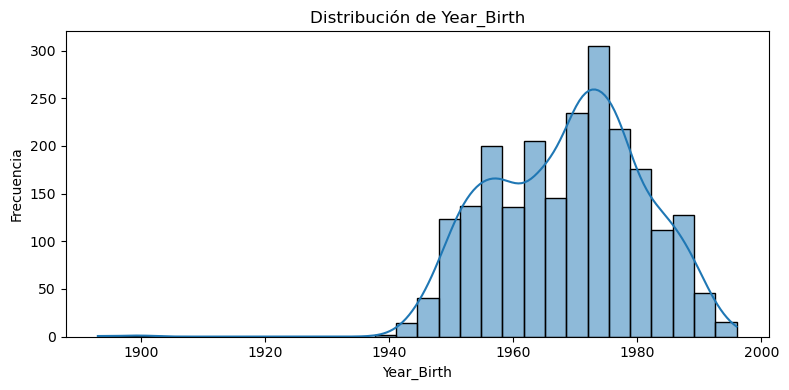

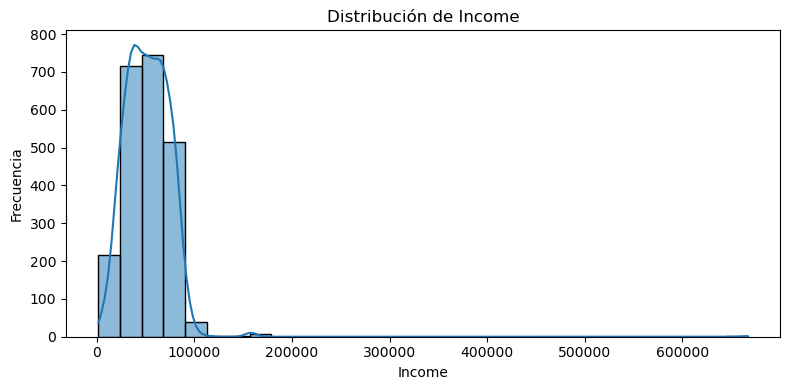

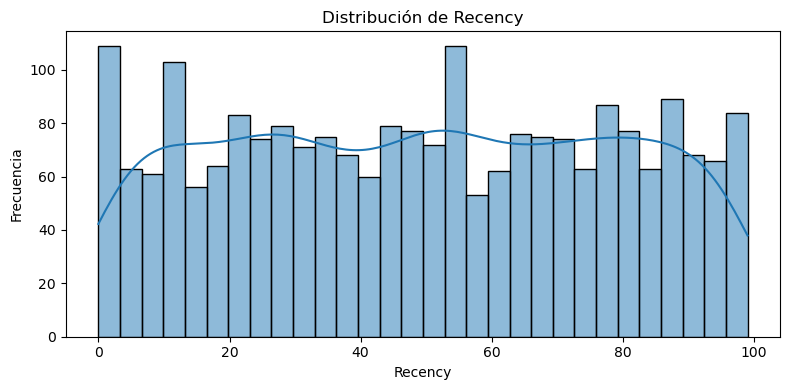

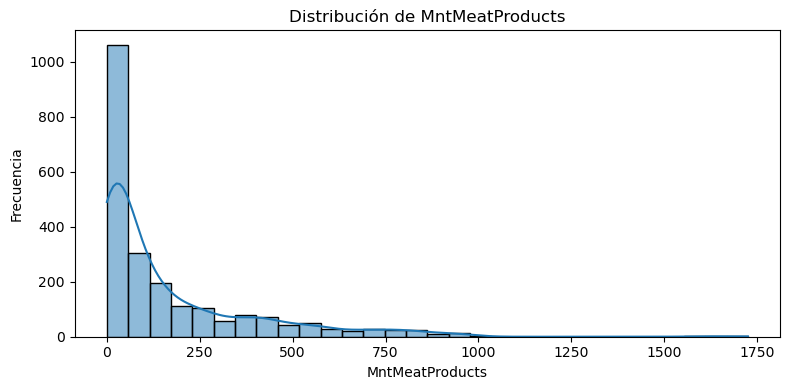

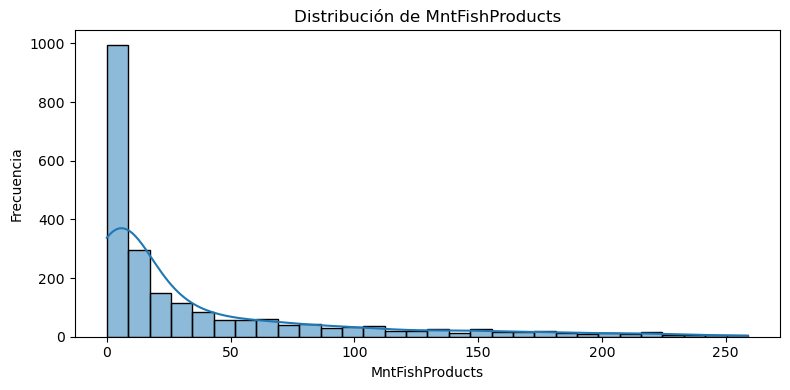

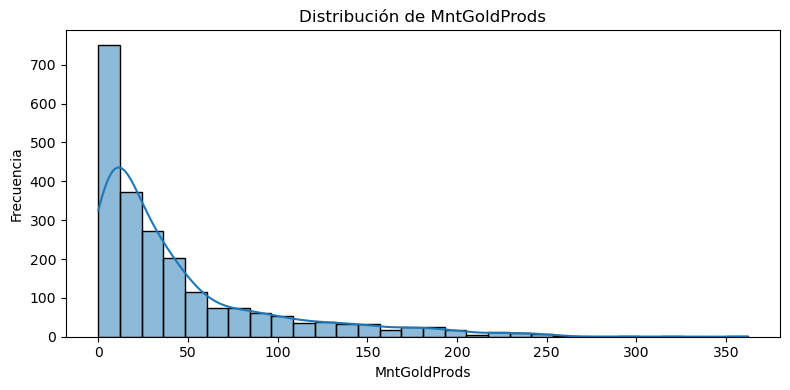

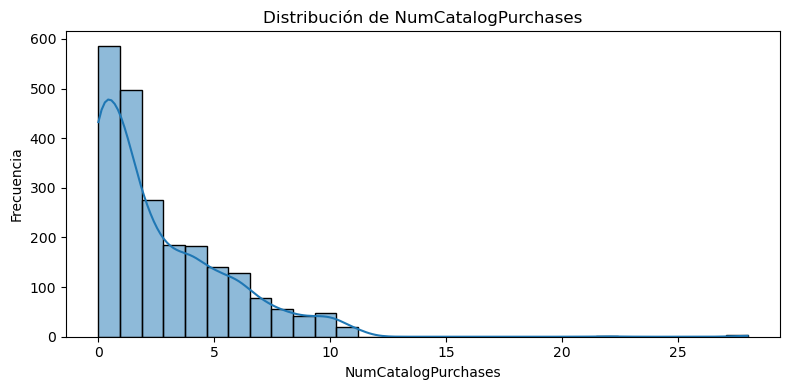


En el análisis de outliers, podemos ver claramente que al combinar la forma numérica (percentiles) y la manera gráfica (con histogramas), podemos observar que existen mayormente distribuciones exponenciales decrecientes en nuestras variables numéricas, con un porcentaje no menor de "outliers", principalmente en las variables de gasto en categorías de producto. Sin embargo, dados estosporcentajes, se decide no eliminar directamente estos registros, teniendo especial cuidado con los que representan un menor porcentaje, lo cual se revisa caso por caso (<5%). Es decir, las columnas que representan un porcentaje mayor a 5% se mantendrán para procesarlas, y las columnas que representen un porcentaje menor al 5% se revisarán para imputarse por la mediana u otros criterios. Esto se aplica así como primer medida para tratar a los outliers perdiendo la menor cantidad de información posible.
Columnas para procesar más adelante: ['MntSweetProducts', 'MntFruits', 'MntFishProducts', 'MntGoldProds',

In [147]:
#Revisión de outliers
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de columnas binarias a excluir manualmente
columnas_binarias = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3',
                     'AcceptedCmp4','AcceptedCmp5','Response','Complain']

# Seleccionar columnas numéricas excluyendo 'Id'
columnas_graficables = [
    col for col in df8.select_dtypes(include=['int64','float64']).columns
    if col not in columnas_binarias + ['ID'] + ['Kidhome'] + ['Teenhome']
]

# Diccionario para guardar el conteo de outliers por columna
outliers_detectados = {}

for col in columnas_graficables:
    Q1 = df8[col].quantile(0.25)
    Q3 = df8[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    
    outliers = df8[(df8[col] < lim_inf) | (df8[col] > lim_sup)]
    cantidad = outliers.shape[0]
    
    outliers_detectados[col] = {
        'outliers_detectados': cantidad,
        'porcentaje': round((cantidad / len(df8)) * 100, 2),
        'limite_inferior': lim_inf,
        'limite_superior': lim_sup
    }

# Mostrar resultados

outliers_df = pd.DataFrame(outliers_detectados).T.sort_values(by='outliers_detectados', ascending=False)
print(outliers_df)

#Graficar la distribución de cada variable válida
for col in columnas_graficables:
    plt.figure(figsize=(8,4))
    sns.histplot(df8[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

print('\nEn el análisis de outliers, podemos ver claramente que al combinar la forma numérica (percentiles) y la manera gráfica ' \
'(con histogramas), podemos observar que existen mayormente distribuciones exponenciales decrecientes en nuestras variables numéricas, ' \
'con un porcentaje no menor de "outliers", principalmente en las variables de gasto en categorías de producto. Sin embargo, dados estos' \
'porcentajes, se decide no eliminar directamente estos registros, teniendo especial cuidado con los que representan un menor porcentaje, ' \
'lo cual se revisa caso por caso (<5%). Es decir, las columnas que representan un porcentaje mayor a 5% se mantendrán para procesarlas, ' \
'y las columnas que representen un porcentaje menor al 5% se revisarán para imputarse por la mediana u otros criterios. Esto ' \
'se aplica así como primer medida para tratar a los outliers perdiendo la menor cantidad de información posible.')

columnas_a_procesar_despues =outliers_df[outliers_df['porcentaje'] > 5].index.tolist()
print("Columnas para procesar más adelante:", columnas_a_procesar_despues)

columnas_a_revisar_caso_a_caso = outliers_df[outliers_df['porcentaje']<=5].index.tolist()
print("\nColumnas a revisar una por una:", columnas_a_revisar_caso_a_caso)

In [148]:
#Tratamiento de valores extremos bajo el 5% de sus distribuciones

# Lista de columnas a revisar una por una (<= 5% outliers)
columnas_a_revisar_cola_derecha = ['NumDealsPurchases', 'MntWines', 'NumCatalogPurchases', 
                      'Income', 'NumWebVisitsMonth', 'NumWebPurchases', 
                      'Recency', 'NumStorePurchases']

for col in columnas_a_revisar_cola_derecha:
    p95 = df8[col].quantile(0.95)
    fuera_del_95 = df8[df8[col] > p95]
    
    print(f"\nAnálisis de valores sobre el percentil 95 para: {col}")
    print(f"- Límite P95: {p95}")
    print(f"- N° de registros por sobre P95: {fuera_del_95.shape[0]} ({round(fuera_del_95.shape[0]/len(df8)*100, 2)}%)")
    print(f"- Mediana total: {df8[col].median()}")
    print(f"- Media total: {df8[col].mean()}")
    print(f"- Mediana (P95+): {fuera_del_95[col].median()}")
    print(f"- Media (P95+): {fuera_del_95[col].mean()}")
    print(f"- Máximo valor: {df8[col].max()}")

    # Mostrar algunos ejemplos de outliers
    print(f"- Ejemplos de registros con valores extremos en '{col}':")
    display(fuera_del_95[[col]].sort_values(by=col, ascending=False).head(5)) #usamos head cola derecha

columnas_a_revisar_cola_izquierda = ['Year_Birth']

for col in columnas_a_revisar_cola_izquierda:
    p005 = df8[col].quantile(0.05)
    debajo_del_005 = df8[df8[col] < p005]
    
    print(f"\nAnálisis de valores bajo el percentil 0.05 para: {col}")
    print(f"- Límite inferior P0.05: {p005}")
    print(f"- N° de registros por debajo P0.05: {debajo_del_005.shape[0]} ({round(debajo_del_005.shape[0]/len(df8)*100, 2)}%)")
    print(f"- Mediana total: {df8[col].median()}")
    print(f"- Media total: {df8[col].mean()}")
    print(f"- Mediana (P0.05-): {debajo_del_005[col].median()}")
    print(f"- Media (P0.05-): {debajo_del_005[col].mean()}")
    print(f"- Mínimo valor: {df8[col].min()}")

    # Mostrar algunos ejemplos de outliers
    print(f"- Ejemplos de registros con valores extremos en '{col}':")
    display(debajo_del_005[[col]].sort_values(by=col, ascending=False).tail(5)) #usamos tail cola izquierda

print('\nLuego de explorar los valores atípicos de las variables numéricas con menor porcentaje del dataset, se toman criterios para ' \
'su procesamiento: algunas se imputarán con la mediana del ingreso agrupando por educación, otras por la mediana del 5% al que ' \
'pertenecen, y otras no se tratarán, considerando que si bien son valores alejados de su tendencia central, pueden representar comportamientos ' \
'de un cluster particular. Ningún registro será eliminado para tener la oportunidad de explorar segmentos valiosos o minoritarios del ' \
'mercado. Los detalles se hallarán en la documentación.')


Análisis de valores sobre el percentil 95 para: NumDealsPurchases
- Límite P95: 6.0
- N° de registros por sobre P95: 86 (3.84%)
- Mediana total: 2.0
- Media total: 2.325
- Mediana (P95+): 8.0
- Media (P95+): 8.848837209302326
- Máximo valor: 15
- Ejemplos de registros con valores extremos en 'NumDealsPurchases':


NumDealsPurchases
21                   15
1245                 15
687                  15
1846                 15
432                  15


Análisis de valores sobre el percentil 95 para: MntWines
- Límite P95: 1000.0
- N° de registros por sobre P95: 111 (4.96%)
- Mediana total: 173.5
- Media total: 303.9357142857143
- Mediana (P95+): 1156.0
- Media (P95+): 1174.6036036036037
- Máximo valor: 1493
- Ejemplos de registros con valores extremos en 'MntWines':


MntWines
1749      1493
559       1492
824       1492
2098      1486
543       1478


Análisis de valores sobre el percentil 95 para: NumCatalogPurchases
- Límite P95: 9.0
- N° de registros por sobre P95: 71 (3.17%)
- Mediana total: 2.0
- Media total: 2.6620535714285714
- Mediana (P95+): 10.0
- Media (P95+): 11.19718309859155
- Máximo valor: 28
- Ejemplos de registros con valores extremos en 'NumCatalogPurchases':


NumCatalogPurchases
21                     28
1653                   28
687                    28
164                    22
636                    11


Análisis de valores sobre el percentil 95 para: Income
- Límite P95: 83926.99999999994
- N° de registros por sobre P95: 112 (5.0%)
- Mediana total: 51498.5
- Media total: 52242.59486607143
- Mediana (P95+): 89655.0
- Media (P95+): 99259.91071428571
- Máximo valor: 666666.0
- Ejemplos de registros con valores extremos en 'Income':


Income
2233  666666.0
617   162397.0
687   160803.0
1300  157733.0
164   157243.0


Análisis de valores sobre el percentil 95 para: NumWebVisitsMonth
- Límite P95: 8.0
- N° de registros por sobre P95: 95 (4.24%)
- Mediana total: 6.0
- Media total: 5.316517857142857
- Mediana (P95+): 9.0
- Media (P95+): 9.821052631578947
- Máximo valor: 20
- Ejemplos de registros con valores extremos en 'NumWebVisitsMonth':


NumWebVisitsMonth
774                  20
9                    20
1245                 20
1042                 19
1846                 19


Análisis de valores sobre el percentil 95 para: NumWebPurchases
- Límite P95: 9.0
- N° de registros por sobre P95: 91 (4.06%)
- Mediana total: 4.0
- Media total: 4.084821428571429
- Mediana (P95+): 11.0
- Media (P95+): 11.164835164835164
- Máximo valor: 27
- Ejemplos de registros con valores extremos en 'NumWebPurchases':


NumWebPurchases
27                 27
1898               27
1975               25
1806               23
18                 11


Análisis de valores sobre el percentil 95 para: Recency
- Límite P95: 94.0
- N° de registros por sobre P95: 103 (4.6%)
- Mediana total: 49.0
- Media total: 49.109375
- Mediana (P95+): 97.0
- Media (P95+): 96.93203883495146
- Máximo valor: 99
- Ejemplos de registros con valores extremos en 'Recency':


Recency
1800       99
1473       99
1542       99
725        99
1820       99


Análisis de valores sobre el percentil 95 para: NumStorePurchases
- Límite P95: 12.0
- N° de registros por sobre P95: 83 (3.71%)
- Mediana total: 5.0
- Media total: 5.790178571428571
- Mediana (P95+): 13.0
- Media (P95+): 13.0
- Máximo valor: 13
- Ejemplos de registros con valores extremos en 'NumStorePurchases':


NumStorePurchases
51                   13
1723                 13
1695                 13
1674                 13
1668                 13


Análisis de valores bajo el percentil 0.05 para: Year_Birth
- Límite inferior P0.05: 1950.0
- N° de registros por debajo P0.05: 110 (4.91%)
- Mediana total: 1970.0
- Media total: 1968.8058035714287
- Mediana (P0.05-): 1947.0
- Media (P0.05-): 1945.5272727272727
- Mínimo valor: 1893
- Ejemplos de registros con valores extremos en 'Year_Birth':


Year_Birth
424         1941
1950        1940
192         1900
339         1899
239         1893


Luego de explorar los valores atípicos de las variables numéricas con menor porcentaje del dataset, se toman criterios para su procesamiento: algunas se imputarán con la mediana del ingreso agrupando por educación, otras por la mediana del 5% al que pertenecen, y otras no se tratarán, considerando que si bien son valores alejados de su tendencia central, pueden representar comportamientos de un cluster particular. Ningún registro será eliminado para tener la oportunidad de explorar segmentos valiosos o minoritarios del mercado. Los detalles se hallarán en la documentación.


       NumCatalogPurchases         Income  NumWebVisitsMonth  NumWebPurchases  \
count          2240.000000    2240.000000        2240.000000      2240.000000   
mean              2.655804   51968.203125           5.324107         4.078125   
std               2.824447   21407.243032           2.382448         2.688647   
min               0.000000    1730.000000           0.000000         0.000000   
25%               0.000000   35538.750000           3.000000         2.000000   
50%               2.000000   51498.500000           6.000000         4.000000   
75%               4.000000   68275.750000           7.000000         6.000000   
max              11.000000  162397.000000          10.000000        11.000000   

        Year_Birth  
count  2240.000000  
mean   1968.864732  
std      11.737451  
min    1941.000000  
25%    1959.000000  
50%    1970.000000  
75%    1977.000000  
max    1996.000000  


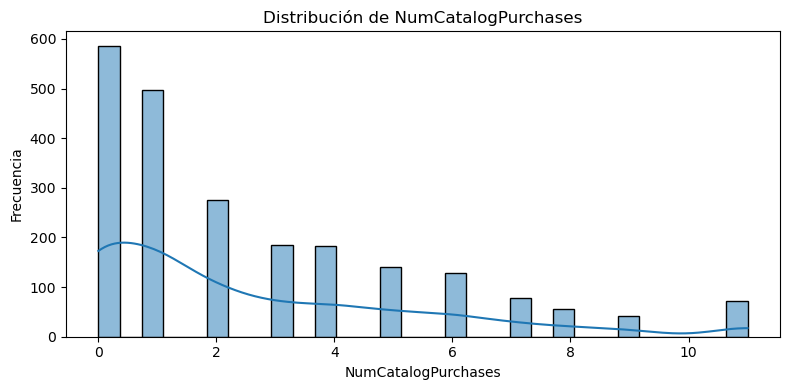

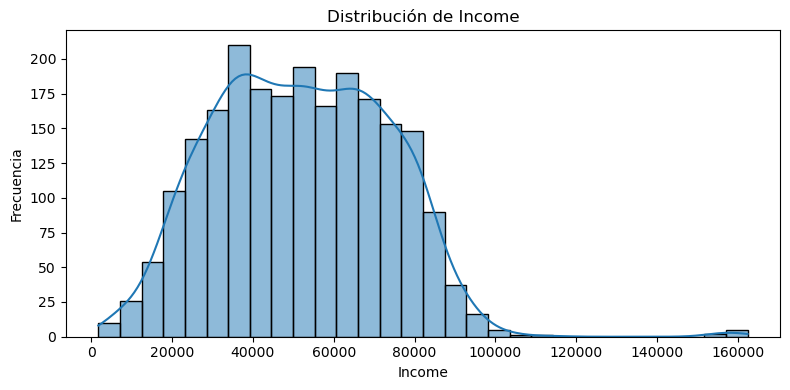

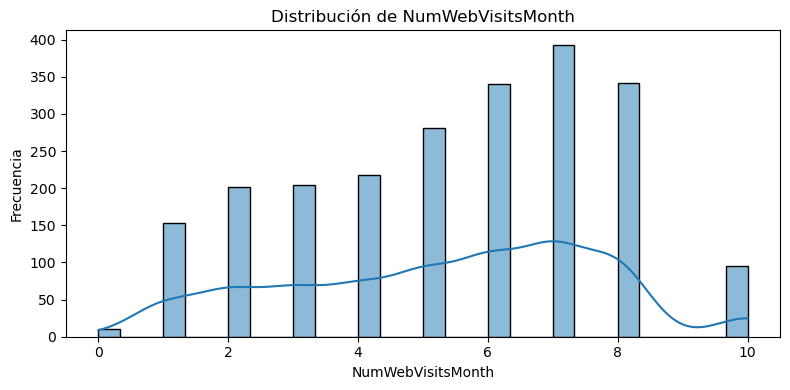

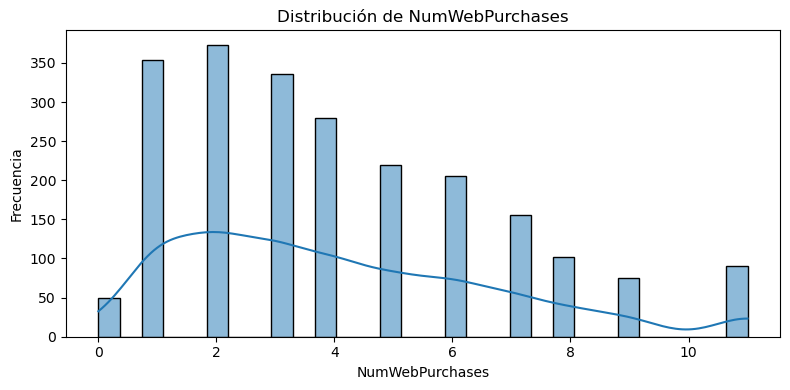


Se puede observar que luego de imputar las variables numéricas, sus distribuciones se ven suavizadas, mostrando menos valores atípicos, sin perder información ni comportamientos que podrían ser valiosos al implementar los algoritmos de clustering.


In [149]:
import numpy as np

# 1. NumCatalogPurchases → imputar valores > p95 por la media del 5% superior
p95_cat = df8['NumCatalogPurchases'].quantile(0.95)
media_cat_5 = df8[df8['NumCatalogPurchases'] > p95_cat]['NumCatalogPurchases'].mean()
df8.loc[df8['NumCatalogPurchases'] > p95_cat, 'NumCatalogPurchases'] = round(media_cat_5)

# 2. Income → imputar 666666 por mediana según Education
medianas_income_edu = df8.groupby('Education')['Income'].median()
df8['Income'] = df8.apply(
    lambda row: medianas_income_edu[row['Education']] if row['Income'] == 666666 else row['Income'],
    axis=1
)

# 3. NumWebVisitsMonth → imputar valores > p95 por media del 5% superior
p95_visits = df8['NumWebVisitsMonth'].quantile(0.95)
media_visits_5 = df8[df8['NumWebVisitsMonth'] > p95_visits]['NumWebVisitsMonth'].mean()
df8.loc[df8['NumWebVisitsMonth'] > p95_visits, 'NumWebVisitsMonth'] = round(media_visits_5)

# 4. NumWebPurchases → imputar valores > p95 por media del 5% superior
p95_web = df8['NumWebPurchases'].quantile(0.95)
media_web_5 = df8[df8['NumWebPurchases'] > p95_web]['NumWebPurchases'].mean()
df8.loc[df8['NumWebPurchases'] > p95_web, 'NumWebPurchases'] = round(media_web_5)

# 5. Year_Birth → imputar los años menores a 1940
min_birth = df8['Year_Birth'].loc[df8['Year_Birth'] > 1940].min()
df8.loc[df8['Year_Birth'] < min_birth, 'Year_Birth'] = min_birth

print(df8[['NumCatalogPurchases', 'Income', 'NumWebVisitsMonth', 'NumWebPurchases', 'Year_Birth']].describe())

columnas_imputadas = ['NumCatalogPurchases', 'Income', 'NumWebVisitsMonth', 'NumWebPurchases', 'Year_Birth']

#Graficar la distribución de cada variable imputada (suavizada)
for col in columnas_imputadas:
    plt.figure(figsize=(8,4))
    sns.histplot(df8[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

print('\nSe puede observar que luego de imputar las variables numéricas, sus distribuciones se ven suavizadas, mostrando menos valores ' \
'atípicos, sin perder información ni comportamientos que podrían ser valiosos al implementar los algoritmos de clustering.')

In [ ]:
#Detalles finales del preprocesamiento de datos

import numpy as np

#Transformar columna Dt_Customer a Date
df8['Dt_Customer'] = df8['Dt_Customer'].astype('datetime64[ns]')

#Transformamos Dt_Customer a Años de Antiguedad del consumidor
df8['Dt_Customer'] = pd.to_datetime(df8['Dt_Customer'], errors='coerce')
df8['Customer_Since_Years'] = ((pd.to_datetime('2025-06-24')- df8['Dt_Customer']).dt.days) //365

#Verificar cambios
print('\nCustomer_Since_Years')
print(df8['Customer_Since_Years'])


Customer_Since_Years
0       13
1       10
2       11
3       10
4       11
        ..
2235    12
2236    10
2237    11
2238    11
2239    12
Name: Customer_Since_Years, Length: 2240, dtype: int64


In [151]:
#Codificación de variables categóricas

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Variables categóricas
ordinal_col = ['Education']
nominal_col = ['Marital_Status']

# Definir el orden para Education (de menor a mayor nivel educativo)
orden_education = [['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']]

# Codificadores
ordinal_encoder = OrdinalEncoder(categories=orden_education)
onehot_encoder = OneHotEncoder(sparse_output=False, drop=None)

# ColumnTransformer para aplicar ambos codificadores
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', ordinal_encoder, ordinal_col),
        ('ohe', onehot_encoder, nominal_col)
    ],
    remainder='passthrough'  # Mantener las demás columnas sin modificar
)

# Aplicar codificación
df_encoded_array = preprocessor.fit_transform(df8)

# Crear nombres de columnas codificadas
nombres_ordinales = ordinal_col
nombres_onehot = preprocessor.named_transformers_['ohe'].get_feature_names_out(nominal_col).tolist()

# Nombres de columnas no transformadas
otras_columnas = [col for col in df8.columns if col not in ordinal_col + nominal_col]

# Unir todo en un nuevo DataFrame
nombres_finales = nombres_ordinales + nombres_onehot + otras_columnas
df8_encoded = pd.DataFrame(df_encoded_array, columns=nombres_finales)

In [152]:
#Estandarización de variables numéricas
from sklearn.preprocessing import StandardScaler # Se usa StandardScaler considerando el tratamiento de los outliers

# Detectar columnas one-hot (todas las que empiezan con "Marital_Status_")
col_dummies = [col for col in df8_encoded.columns if col.startswith('Marital_Status_')]

# Education ya fue codificada como ordinal (solo una columna, probablemente con ese mismo nombre)
col_ordinales = ['Education']

# Variables a no escalar
columnas_no_escalar = col_ordinales + col_dummies

# Variables que sí se van a escalar (numéricas continuas, excluimos ID, Dt_Customer y variables binarias)
columnas_a_escalar = [col for col in df8_encoded.columns if col not in columnas_no_escalar + ['ID', 'Dt_Customer'] + columnas_binarias]

# Aplicar estandarización solo a las columnas seleccionadas
scaler = StandardScaler()
df_scaled_values = scaler.fit_transform(df8_encoded[columnas_a_escalar])
df_scaled = pd.DataFrame(df_scaled_values, columns=columnas_a_escalar)

# Concatenar columnas no escaladas para reconstruir df8_clean
df8_clean = pd.concat([
    df_scaled.reset_index(drop=True),
    df8_encoded[columnas_no_escalar + columnas_binarias].reset_index(drop=True)
], axis=1)

#Verificar cambios
print(df8_clean)

      Year_Birth    Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0      -1.011070  0.288275 -0.825218 -0.929894  0.307039  0.983781   1.551577   
1      -1.266719 -0.262783  1.032559  0.906934 -0.383664 -0.870479  -0.636301   
2      -0.329339  0.917875 -0.825218 -0.929894 -0.798086  0.362723   0.570804   
3       1.289773 -1.183144  1.032559 -0.929894 -0.798086 -0.870479  -0.560857   
4       1.034124  0.295517  1.032559 -0.929894  1.550305 -0.389085   0.419916   
...          ...       ...       ...       ...       ...       ...        ...   
2235   -0.158906  0.432417 -0.825218  0.906934 -0.107383  1.203678   0.419916   
2236   -1.948450  0.562823  2.890335  0.906934  0.237969  0.303291  -0.661449   
2237    1.034124  0.234216 -0.825218 -0.929894  1.446700  1.795020   0.545656   
2238   -1.096286  0.807234 -0.825218  0.906934 -1.419719  0.368666   0.092992   
2239   -1.266719  0.042088  1.032559  0.906934 -0.314594 -0.653555  -0.586005   

      MntMeatProducts  MntF

In [153]:
# Análisis de componentes PCA
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# 1. Aplicar PCA sin limitar componentes
pca = PCA()
pca.fit(df8_clean)

# 2. Extraer varianza explicada por componente
varianza_explicada = pca.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_explicada)

# 3.Mostrar los 10 primeros componentes
for i, (var_,acum_) in enumerate(zip(varianza_explicada[:10], varianza_acumulada[:10])):
    print(f'PC{i+1}: Varianza explicada = {var_:.4f}, Acumulada = {acum_:.4f}')

# Gráfico de varianza acumulada
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(varianza_acumulada)+1), varianza_acumulada, marker='o', linestyle='--', color='b')
plt.title('Varianza explicada acumulada por número de componentes')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.axhline(y=0.80, color='r', linestyle='--', label='80% varianza')
plt.axhline(y=0.90, color='g', linestyle='--', label='90% varianza')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print('\nLuego de analizar los componentes principales que explican la varianza de nuestro dataset, podemos quedarnos con los 10 ' \
'componentes principales capaces de explicar el 80% de nuestra varianza acumulada (el 80% de nuestro dataset original).\n')

# Aplicar PCA con 10 componentes
pca_10 = PCA(n_components=10)
df8_pca_array = pca_10.fit_transform(df8_clean)

# Crear DataFrame con nombres de columnas significativos
columnas_pca = [f'PC{i+1}' for i in range(10)]
df8_pca = pd.DataFrame(df8_pca_array, columns=columnas_pca)

# Mostrar un vistazo
print(df8_pca.head())

PC1: Varianza explicada = 0.3313, Acumulada = 0.3313
PC2: Varianza explicada = 0.1086, Acumulada = 0.4400
PC3: Varianza explicada = 0.0802, Acumulada = 0.5201
PC4: Varianza explicada = 0.0546, Acumulada = 0.5747
PC5: Varianza explicada = 0.0523, Acumulada = 0.6271
PC6: Varianza explicada = 0.0459, Acumulada = 0.6729
PC7: Varianza explicada = 0.0388, Acumulada = 0.7118
PC8: Varianza explicada = 0.0338, Acumulada = 0.7455
PC9: Varianza explicada = 0.0322, Acumulada = 0.7778
PC10: Varianza explicada = 0.0296, Acumulada = 0.8074



Luego de analizar los componentes principales que explican la varianza de nuestro dataset, podemos quedarnos con los 10 componentes principales capaces de explicar el 80% de nuestra varianza acumulada (el 80% de nuestro dataset original).

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  4.025034  0.124692  2.540737 -0.086435  0.606575  1.722826  1.425860   
1 -2.363425 -0.244597 -2.039800 -1.085663 -1.210719 -0.933243  0.385588   
2  1.913390 -0.397021 -0.257531  0.204744 -1.067277 -0.056970 -0.915549   
3 -2.637724 -1.734397 -0.383034  0.604537 -0.890644 -1.698309 -0.606420   
4 -0.231060  0.016195  0.073982  0.586209  1.873754 -2.138085  0.860524   

        PC8       PC9      PC10  
0  1.176814 -0.198265 -1.384906  
1  0.274089  0.244611 -0.899819  
2 -0.204982 -1.183387 -0.617715  
3  0.000050 -0.242180 -0.433972  
4  0.345079 -0.473983  0.388126  


In [154]:
# Para escoger el algoritmo de clustering más adecuado, realizamos una visualización de nuestros PCA
import plotly.express as px

# Gráfico 2D: PC1 vs PC2
plt.figure(figsize=(8, 6))
plt.scatter(df8_pca['PC1'], df8_pca['PC2'], alpha=0.5, s=20, color='steelblue')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Dispersión 2D de PC1 vs PC2')
plt.grid(True)
plt.tight_layout()
plt.show()

# Crear gráfico 3D con Plotly
fig = px.scatter_3d(
    df8_pca,
    x='PC1',
    y='PC2',
    z='PC3',
    opacity=0.6,
    color_discrete_sequence=['orange'],  # Color único para todos
    width=800,
    height=600
)

fig.update_layout(
    title='Dispersión 3D interactiva de PC1 vs PC2 vs PC3',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    )
)

fig.show()

print('\nLuego de explorar la forma de nuestros componentes principales, podemos ver que hay grupos densos y separados, pero no ' \
'esféricos. Más bien es una nube dispersa que se concentra en ciertos tramos, pero no  hay cortes naturales de clusters a la vista. ' \
'Es por ello que trataremos distintos algoritmos de clustering para evaluar posteriormente la calidad de cada uno.')


Luego de explorar la forma de nuestros componentes principales, podemos ver que hay grupos densos y separados, pero no esféricos. Más bien es una nube dispersa que se concentra en ciertos tramos, pero no  hay cortes naturales de clusters a la vista. Es por ello que trataremos distintos algoritmos de clustering para evaluar posteriormente la calidad de cada uno.


In [155]:
#Implementación de KMeans

from sklearn.cluster import KMeans

# Rango de valores de k a probar
rango_k = range(1, 11)
inertias = []

# Aplicar K-Means para cada k
for k in rango_k:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(df8_pca)
    inertias.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(rango_k, inertias, marker='o', linestyle='--')
plt.title('Método del codo para K-Means')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia (suma de distancias al centro del cluster)')
plt.grid(True)
plt.tight_layout()
plt.show()

print('\nPodemos visualizar según el método del codo que la inercia no baja significamente desde k=3, por lo tanto aplicamos KMeans ' \
'con este valor.\n')

#Aplicar KMeans con k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
df8_pca['Cluster'] =kmeans.fit_predict(df8_pca)

#Vemos distribución de clientes por cluster
print(df8_pca['Cluster'].value_counts().sort_index())


Podemos visualizar según el método del codo que la inercia no baja significamente desde k=3, por lo tanto aplicamos KMeans con este valor.

Cluster
0    1025
1     587
2     628
Name: count, dtype: int64


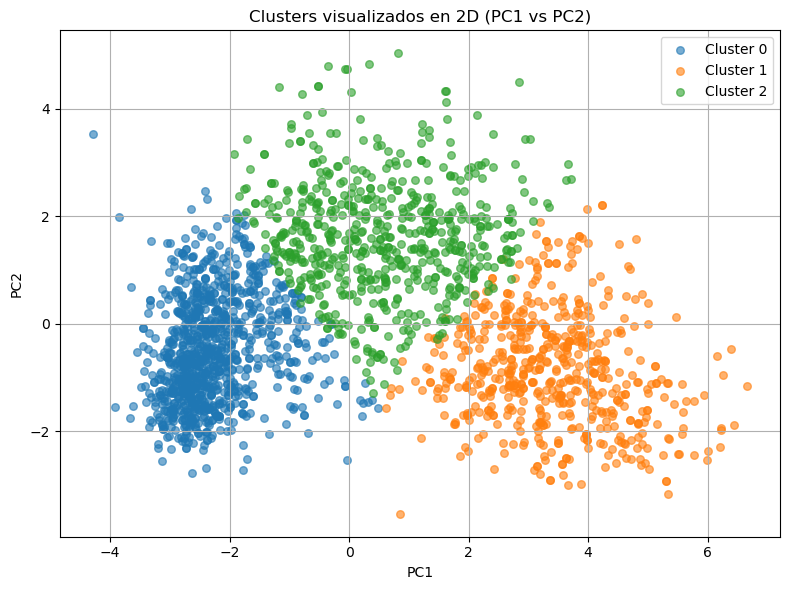

 Silhouette Score: 0.2378
 Davies-Bouldin Index: 1.6324

Luego de aplicar el algoritmo KMeans y evaluar las métricas de calidad del clustering, tenemos resultados desfavorables:Silhouette Score muy bajo (0.23), lo que señala una mala separación de clusters. A su vez, Davies Bouldin arroja 1.63, donde realmente lo ideal es que sea menor que 1, también señala en este caso clusters no bien separados.

Dado los resultados de KMeans, se procederá a aplicar el algoritmo DBSCAN, el cual es más adecuado en este caso cuando los clusters no presentan forma esférica y poseen ruido.


In [156]:
#Visualizar los cluster 2D y 3D de KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Visualización en 2D

plt.figure(figsize=(8, 6))
for cluster in sorted(df8_pca['Cluster'].unique()):
    subset = df8_pca[df8_pca['Cluster'] == cluster]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {cluster}', alpha=0.6, s=30)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters visualizados en 2D (PC1 vs PC2)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualización en 3D (interactiva)

fig = px.scatter_3d(
    df8_pca,
    x='PC1',
    y='PC2',
    z='PC3',
    color='Cluster',
    opacity=0.7,
    title='Clusters visualizados en 3D (PC1 vs PC2 vs PC3)',
    color_continuous_scale='Plasma'
)
fig.update_layout(scene=dict(
    xaxis_title='PC1',
    yaxis_title='PC2',
    zaxis_title='PC3'
))
fig.show()


# Métricas de evaluación

# Silhouette Score
sil_score = silhouette_score(df8_pca.drop('Cluster', axis=1), df8_pca['Cluster'])

# Davies-Bouldin Index
db_index = davies_bouldin_score(df8_pca.drop('Cluster', axis=1), df8_pca['Cluster'])

print(f" Silhouette Score: {sil_score:.4f}")
print(f" Davies-Bouldin Index: {db_index:.4f}")

print('\nLuego de aplicar el algoritmo KMeans y evaluar las métricas de calidad del clustering, tenemos resultados desfavorables:' \
'Silhouette Score muy bajo (0.23), lo que señala una mala separación de clusters. A su vez, Davies Bouldin arroja 1.63, donde realmente ' \
'lo ideal es que sea menor que 1, también señala en este caso clusters no bien separados.')

print('\nDado los resultados de KMeans, se procederá a aplicar el algoritmo DBSCAN, el cual es más adecuado en este caso cuando los ' \
'clusters no presentan forma esférica y poseen ruido.')

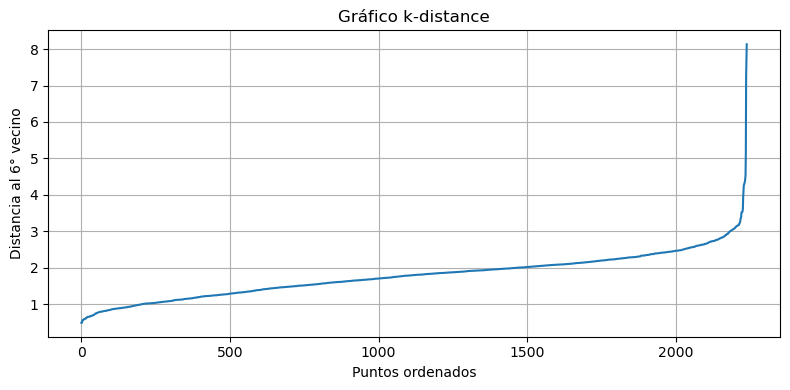


Apreciamos que el gráfico k-distance se eleva bruscamente en torno al valor 2300. Este valor será nuestro eps.

DBSCAN_Cluster
0    2240
Name: count, dtype: int64
 No se encontraron suficientes clusters válidos para calcular métricas.



Luego de aplicar DBSCAN, podemos concluir que este algoritmo no es capaz de capturar el comportamiento disperso de nuestros datos. Esto se podría concluir ya que no hay densidad uniforme en nuestros datos que permita agrupar en base a la cercanía de los vecinos.

Se intentará aplicar Clustering Jerárquico Aglomerativo, el cual es más flexible para datos dispersos, irregulares y con falta de densidad.


In [157]:
#Aplicación de DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Usamos los primeros 10 componentes del PCA como base
X = df8_pca.drop(columns='Cluster', errors='ignore')

# Elegimos min_samples = 6 como punto de partida
min_samples = 6

# Vecinos más cercanos
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Ordenamos la distancia al k-ésimo vecino
k_distances = np.sort(distances[:, -1])

# Graficamos
plt.figure(figsize=(8, 4))
plt.plot(k_distances)
plt.title('Gráfico k-distance')
plt.xlabel('Puntos ordenados')
plt.ylabel(f'Distancia al {min_samples}° vecino')
plt.grid(True)
plt.tight_layout()
plt.show()

print('\nApreciamos que el gráfico k-distance se eleva bruscamente en torno al valor 2300. Este valor será nuestro eps.\n')

# Usar eps ajustado visualmente
eps = 2300

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
df8_pca['DBSCAN_Cluster'] = dbscan.fit_predict(X)

# Mostrar distribución de etiquetas
print(df8_pca['DBSCAN_Cluster'].value_counts().sort_index())

#Evaluamos DBSCAN

# Filtrar puntos que no son ruido (-1)
X_valid = X[df8_pca['DBSCAN_Cluster'] != -1]
labels_valid = df8_pca.loc[df8_pca['DBSCAN_Cluster'] != -1, 'DBSCAN_Cluster']

if len(np.unique(labels_valid)) > 1:
    sil_score = silhouette_score(X_valid, labels_valid)
    db_index = davies_bouldin_score(X_valid, labels_valid)
    print(f" Silhouette Score: {sil_score:.4f}")
    print(f" Davies-Bouldin Index: {db_index:.4f}")
else:
    print(" No se encontraron suficientes clusters válidos para calcular métricas.")

# Gráfico 2D
plt.figure(figsize=(8, 6))
for cluster in sorted(df8_pca['DBSCAN_Cluster'].unique()):
    subset = df8_pca[df8_pca['DBSCAN_Cluster'] == cluster]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {cluster}', alpha=0.6, s=30)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters con DBSCAN en 2D (PC1 vs PC2)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico 3D interactivo
fig = px.scatter_3d(
    df8_pca,
    x='PC1',
    y='PC2',
    z='PC3',
    color='DBSCAN_Cluster',
    opacity=0.7,
    title='Clusters con DBSCAN en 3D (PC1 vs PC2 vs PC3)',
    color_continuous_scale='Turbo'
)
fig.update_layout(scene=dict(
    xaxis_title='PC1',
    yaxis_title='PC2',
    zaxis_title='PC3'
))
fig.show()

print('\nLuego de aplicar DBSCAN, podemos concluir que este algoritmo no es capaz de capturar el comportamiento disperso de nuestros ' \
'datos. Esto se podría concluir ya que no hay densidad uniforme en nuestros datos que permita agrupar en base a la cercanía de los ' \
'vecinos.')

print('\nSe intentará aplicar Clustering Jerárquico Aglomerativo, el cual es más flexible para datos dispersos, irregulares y con ' \
'falta de densidad.')

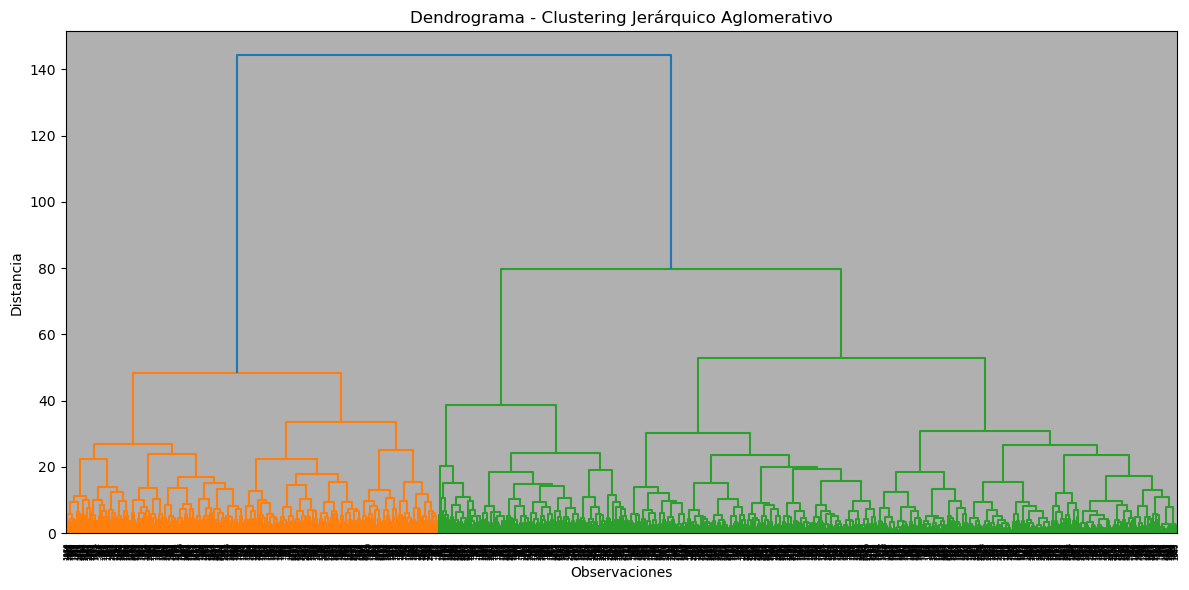


Al igual que con KMeans, empezaremos probando con 3 clusters.
Agglo_Cluster
0    1108
1     752
2     380
Name: count, dtype: int64
Silhouette Score: 0.2202
Davies-Bouldin Index: 1.7040



Luego de aplicar Clustering Jerárquico Aglomerativo, podemos observar que tenemos resultados bastante similares a KMeans, con una leve mejora en ambos indicadores. Sin embargo, este algoritmo sigue sin representar de la mejor forma nuestros datos. La sospecha principal está en que nuestros datos representan una transición progresiva entre perfiles de clientes, en vez de grupos aislados (algo que puede explicarse por el amplio rango etario). El solapamiento puede deberse a gradientes de comportamiento y/o edad, algo común en análisis generacional.

Es por ello, que se intentará aplicar Gaussian Mixture Models (GMM), que asigna probabilidad de pertenencia de clusters a los registros, y es más capaz de detectar solapamientos entre segmentos. Este algoritmo permite que un registro pertenezca a más de un cluster


In [158]:
#Implementación de Clustering Jerárquico Aglomerativo
from scipy.cluster.hierarchy import linkage, dendrogram

# Matriz de distancias entre puntos (usamos PCA reducido)
X = df8_pca.drop(columns=['Cluster', 'DBSCAN_Cluster'], errors='ignore') #eliminamos los clustering de los otros algoritmos

#Calcular linkage matrix
Z = linkage(X, method='ward')

# Dibujar el dendrograma
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='level', p=25)  # Ajusta "p" según la profundidad que quieras mostrar
plt.title('Dendrograma - Clustering Jerárquico Aglomerativo')
plt.xlabel('Observaciones')
plt.ylabel('Distancia')
plt.tight_layout()
plt.grid(True)
plt.show()

print('\nAl igual que con KMeans, empezaremos probando con 3 clusters.')

#Aplicamos Cluster Jerárquico Aglomerativo
from sklearn.cluster import AgglomerativeClustering

# Número de clusters 
n_clusters = 3  

agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
df8_pca['Agglo_Cluster'] = agglo.fit_predict(X)

# Ver distribución de clusters
print(df8_pca['Agglo_Cluster'].value_counts().sort_index())

#Métricas

sil_score = silhouette_score(X, df8_pca['Agglo_Cluster'])
db_index = davies_bouldin_score(X, df8_pca['Agglo_Cluster'])

print(f"Silhouette Score: {sil_score:.4f}")
print(f"Davies-Bouldin Index: {db_index:.4f}")

#Visualización 2D

plt.figure(figsize=(8, 6))
for cluster in sorted(df8_pca['Agglo_Cluster'].unique()):
    subset = df8_pca[df8_pca['Agglo_Cluster'] == cluster]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {cluster}', alpha=0.6, s=30)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters Jerárquicos en 2D (PC1 vs PC2)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#visualización 3D

fig = px.scatter_3d(
    df8_pca,
    x='PC1',
    y='PC2',
    z='PC3',
    color='Agglo_Cluster',
    opacity=0.7,
    title='Clusters Jerárquicos en 3D (PC1 vs PC2 vs PC3)',
    color_continuous_scale='Viridis'
)
fig.update_layout(scene=dict(
    xaxis_title='PC1',
    yaxis_title='PC2',
    zaxis_title='PC3'
))
fig.show()

print('\nLuego de aplicar Clustering Jerárquico Aglomerativo, podemos observar que tenemos resultados bastante similares a KMeans, con una leve mejora en ' \
'ambos indicadores. Sin embargo, este algoritmo sigue sin representar de la mejor forma nuestros datos. La sospecha principal está en que nuestros datos ' \
'representan una transición progresiva entre perfiles de clientes, en vez de grupos aislados (algo que puede explicarse por el amplio rango etario). El ' \
'solapamiento puede deberse a gradientes de comportamiento y/o edad, algo común en análisis generacional.')

print('\nEs por ello, que se intentará aplicar Gaussian Mixture Models (GMM), que asigna probabilidad de pertenencia de clusters a los registros, y es ' \
'más capaz de detectar solapamientos entre segmentos. Este algoritmo permite que un registro pertenezca a más de un cluster')

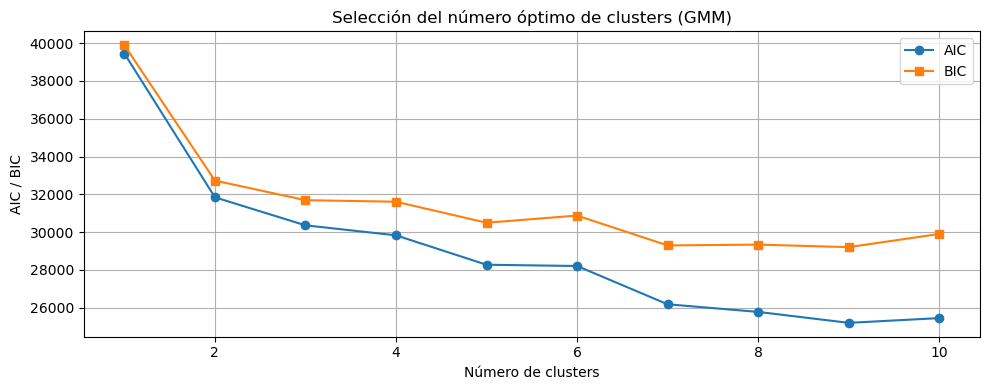


Se usa el número óptimo de clusters = 9 dado que resulta el mínimo de BIC.

GMM_Cluster
0     73
1    274
2    227
3    376
4    225
5    279
6    393
7    190
8    203
Name: count, dtype: int64
 Silhouette Score: 0.0415
 Davies-Bouldin Index: 3.9564


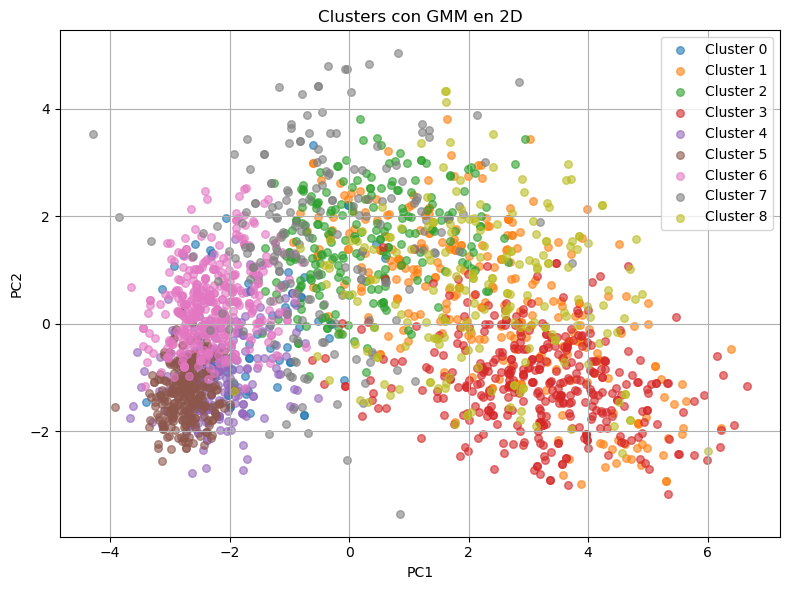


Luego de aplicar GMM, podemos ver que el modelo da resultados muy desfavorables para una segmentación de clientes. Sus métricas de evaluación son las peores de todos los modelos implementados. Esto se puede deber a que GMM es muy permisivo con la superposición al intentar modelar cada cluster como una gaussiana, y si los datos no cumplen con esta distribución (que ya sabemos que es más bien exponencial decreciente), forma clusters artificiales para ajustarse a la varianza residual. Sin embargo, puede que la reducción de dimensionalidad (PCA) haya distorsionado comportamiento gaussiano que pueda ser adecuado para este algoritmo. De esta forma, se intentará correr GMM con las variables estandarizadas originales (sin PCA).


In [159]:
#Implementación de GMM
from sklearn.mixture import GaussianMixture

#Buscar número óptimo de clusters usando AIC/BIC

X = df8_pca.drop(columns=['Cluster','DBSCAN','Agglo_Cluster'], errors='ignore') #eliminamos resultados algoritmos anteriores

aic_vals, bic_vals = [],[]
n_components_range = range(1,11)

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(X)
    aic_vals.append(gmm.aic(X))
    bic_vals.append(gmm.bic(X))

plt.figure(figsize=(10, 4))
plt.plot(n_components_range, aic_vals, marker='o', label='AIC')
plt.plot(n_components_range, bic_vals, marker='s', label='BIC')
plt.xlabel('Número de clusters')
plt.ylabel('AIC / BIC')
plt.title('Selección del número óptimo de clusters (GMM)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print('\nSe usa el número óptimo de clusters = 9 dado que resulta el mínimo de BIC.\n')

# Entrenar GMM en base a resultados
optimal_clusters = 9

gmm_final = GaussianMixture(n_components=optimal_clusters, random_state=42)
gmm_labels = gmm_final.fit_predict(X)

df8_pca['GMM_Cluster'] = gmm_labels

# Revisión de distribución
print(df8_pca['GMM_Cluster'].value_counts().sort_index())

sil_score = silhouette_score(X, gmm_labels)
db_index = davies_bouldin_score(X, gmm_labels)

print(f" Silhouette Score: {sil_score:.4f}")
print(f" Davies-Bouldin Index: {db_index:.4f}")

#Visualización 2D
plt.figure(figsize=(8, 6))
for cluster in sorted(df8_pca['GMM_Cluster'].unique()):
    subset = df8_pca[df8_pca['GMM_Cluster'] == cluster]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {cluster}', alpha=0.6, s=30)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters con GMM en 2D')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Visualización 3D
fig = px.scatter_3d(
    df8_pca,
    x='PC1',
    y='PC2',
    z='PC3',
    color='GMM_Cluster',
    opacity=0.7,
    title='Clusters con GMM en 3D (PC1 vs PC2 vs PC3)',
    color_continuous_scale='Plasma'
)
fig.update_layout(scene=dict(
    xaxis_title='PC1',
    yaxis_title='PC2',
    zaxis_title='PC3'
))
fig.show()

print('\nLuego de aplicar GMM, podemos ver que el modelo da resultados muy desfavorables para una segmentación de clientes. Sus métricas de evaluación ' \
'son las peores de todos los modelos implementados. Esto se puede deber a que GMM es muy permisivo con la superposición al intentar modelar cada cluster como ' \
'una gaussiana, y si los datos no cumplen con esta distribución (que ya sabemos que es más bien exponencial decreciente), forma clusters artificiales para ' \
'ajustarse a la varianza residual. Sin embargo, puede que la reducción de dimensionalidad (PCA) haya distorsionado comportamiento gaussiano que pueda ser ' \
'adecuado para este algoritmo. De esta forma, se intentará correr GMM con las variables estandarizadas originales (sin PCA).')

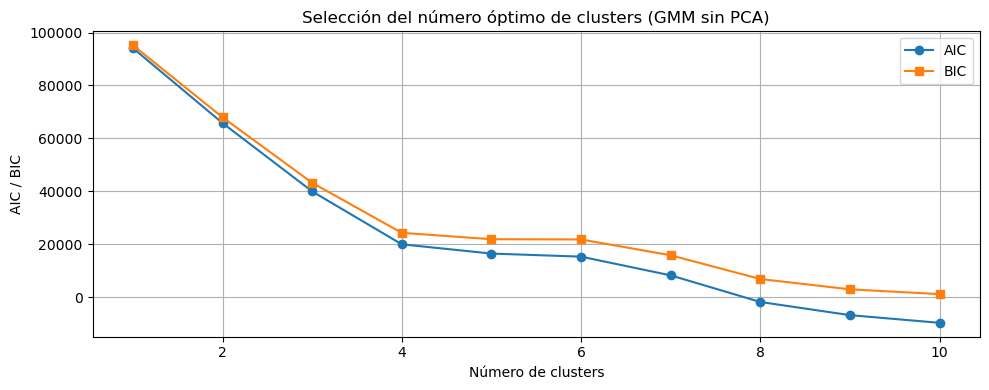

GMM_Cluster
0    853
1    515
2    872
Name: count, dtype: int64
Silhouette Score: 0.1937
Davies-Bouldin Index: 2.0122


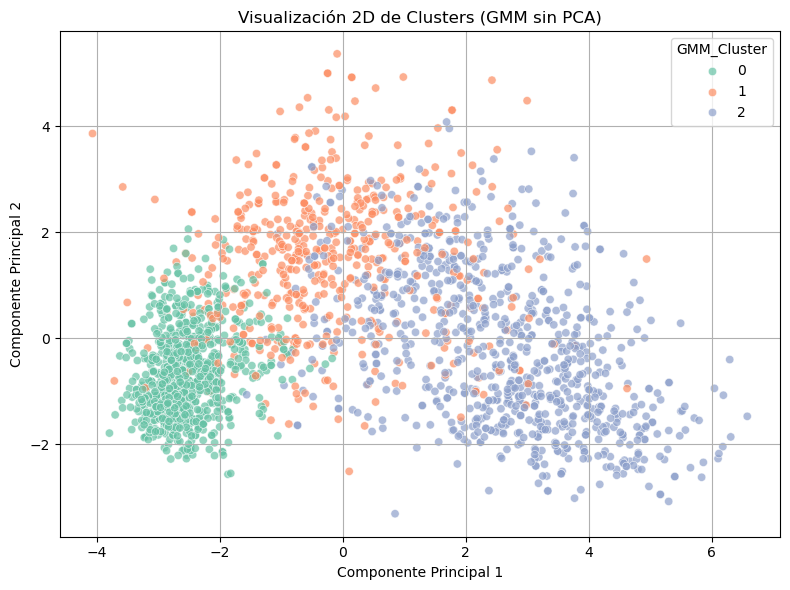

In [ ]:
#Implementar GMM sobre variables estandarizadas originales (df8_clean)

# Nos aseguramos de tener solo variables numéricas
X_clean = df8_clean.drop(columns=['ID','Cluster','DBSCAN','Agglo_Cluster','GMM_Cluster'], errors='ignore')
X_clean = df8_clean.select_dtypes(include=['float64', 'int64'])

aic_vals, bic_vals = [], []
n_components_range = range(1, 11)

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(X_clean)
    aic_vals.append(gmm.aic(X_clean))
    bic_vals.append(gmm.bic(X_clean))

plt.figure(figsize=(10, 4))
plt.plot(n_components_range, aic_vals, marker='o', label='AIC')
plt.plot(n_components_range, bic_vals, marker='s', label='BIC')
plt.xlabel('Número de clusters')
plt.ylabel('AIC / BIC')
plt.title('Selección del número óptimo de clusters (GMM sin PCA)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Clusters óptimos según modelos anteriores
optimal_clusters = 3

gmm_final = GaussianMixture(n_components=optimal_clusters, random_state=42)
gmm_labels = gmm_final.fit_predict(X_clean)

df8_clean['GMM_Cluster'] = gmm_labels

# Distribución de registros por cluster
print(df8_clean['GMM_Cluster'].value_counts().sort_index())

sil_score = silhouette_score(X_clean, df8_clean['GMM_Cluster'])
db_index = davies_bouldin_score(X_clean, df8_clean['GMM_Cluster'])

print(f"Silhouette Score: {sil_score:.4f}")
print(f"Davies-Bouldin Index: {db_index:.4f}")

import seaborn as sns

pca_vis = PCA(n_components=2)
X_vis = pca_vis.fit_transform(X_clean)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], hue=df8_clean['GMM_Cluster'], palette='Set2', alpha=0.7)
plt.title('Visualización 2D de Clusters (GMM sin PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.tight_layout()
plt.show()

print('\nLuego de aplicar GMM sin PCA, vemos que tiene una mejoría notable respecto a su aplicación con PCA. Sin embargo, no es suficiente para catalogarlo ' \
'como un algoritmo aceptable para nuestro dataset.')

print('\nPor lo tanto, el algoritmo a usar para nuestro clustering final será Clustering Jerárquico Aglomerativo, dado que obtuvo las mejores métricas de ' \
'calidad. Cabe recalcar que, si bien las métricas de evaluación de este algoritmo tampoco son deseables para el clustering, hay que considerar que nuestro ' \
'dataset no tiene clusters necesariamente disjuntos, más bien reflejan gradientes generacionales de consumo.')

C:\Users\esteb\AppData\Local\Temp\ipykernel_22968\911285145.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




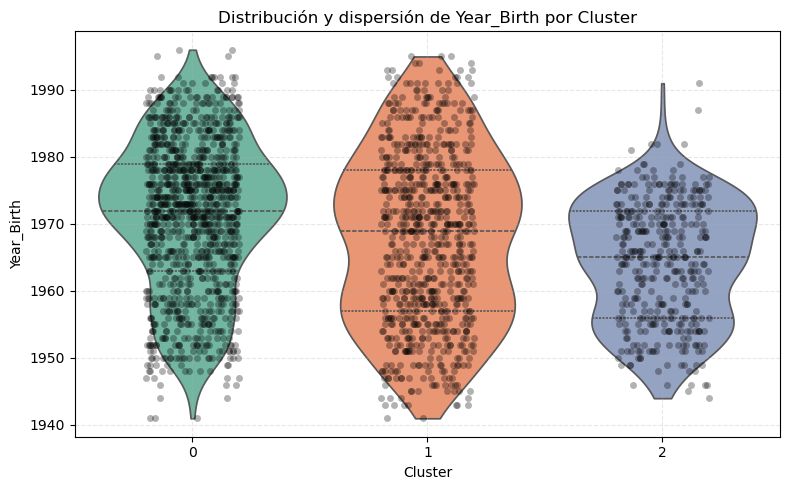

C:\Users\esteb\AppData\Local\Temp\ipykernel_22968\911285145.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




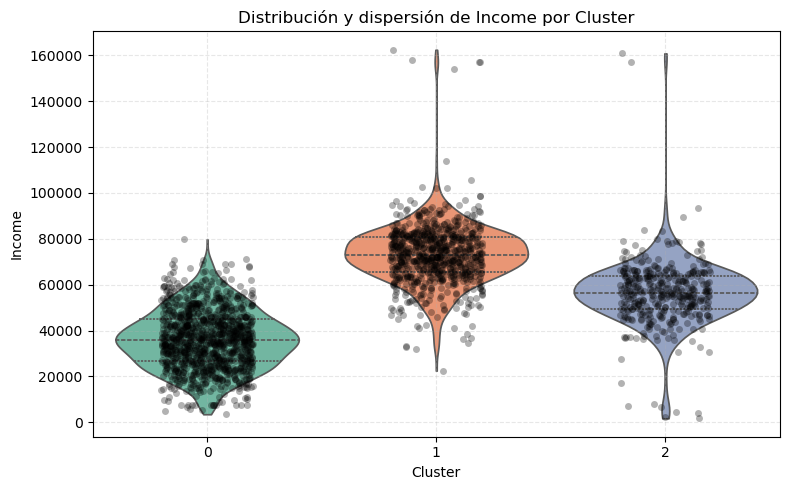

C:\Users\esteb\AppData\Local\Temp\ipykernel_22968\911285145.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




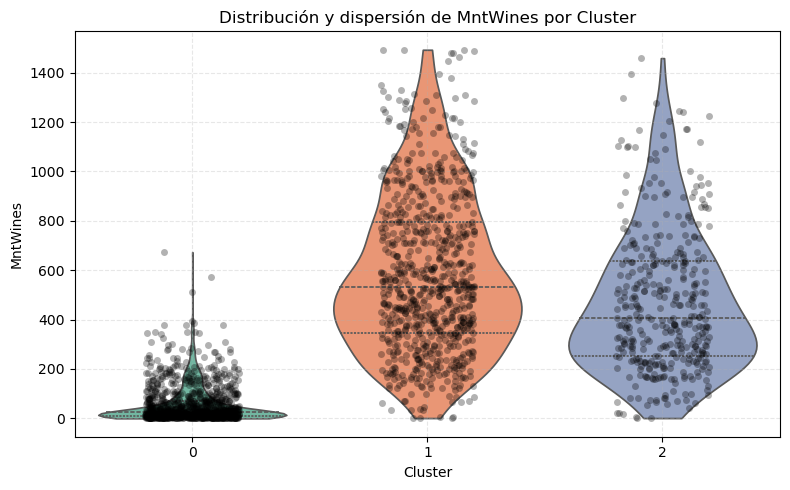

C:\Users\esteb\AppData\Local\Temp\ipykernel_22968\911285145.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




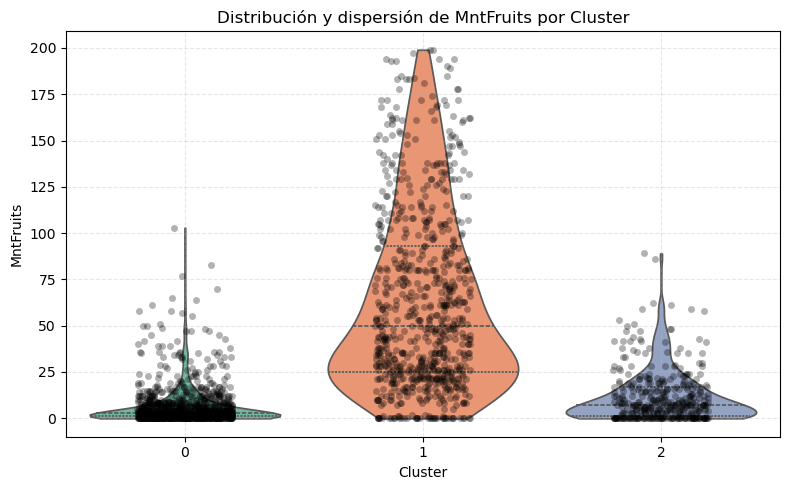

C:\Users\esteb\AppData\Local\Temp\ipykernel_22968\911285145.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




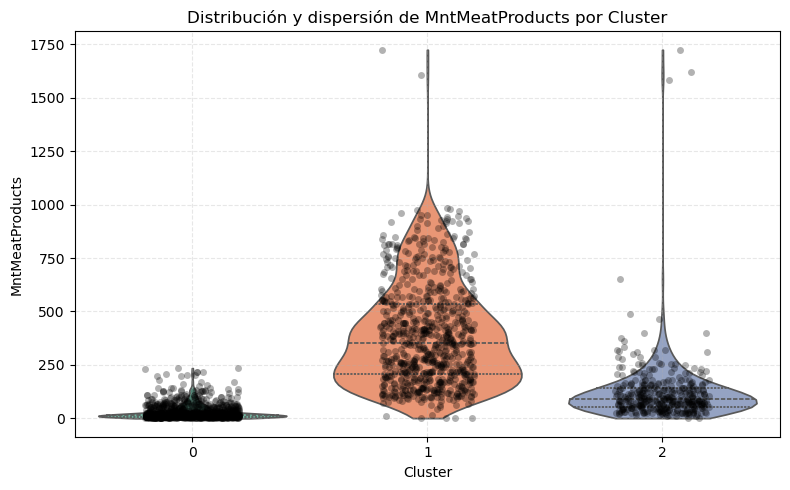

C:\Users\esteb\AppData\Local\Temp\ipykernel_22968\911285145.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




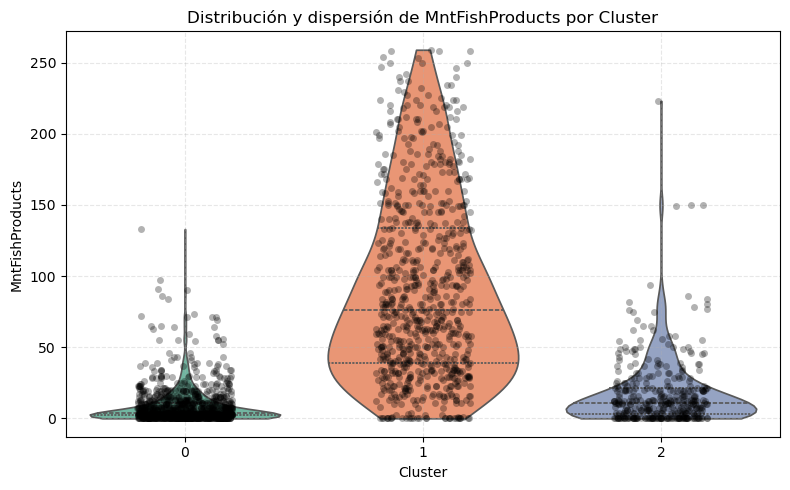

C:\Users\esteb\AppData\Local\Temp\ipykernel_22968\911285145.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




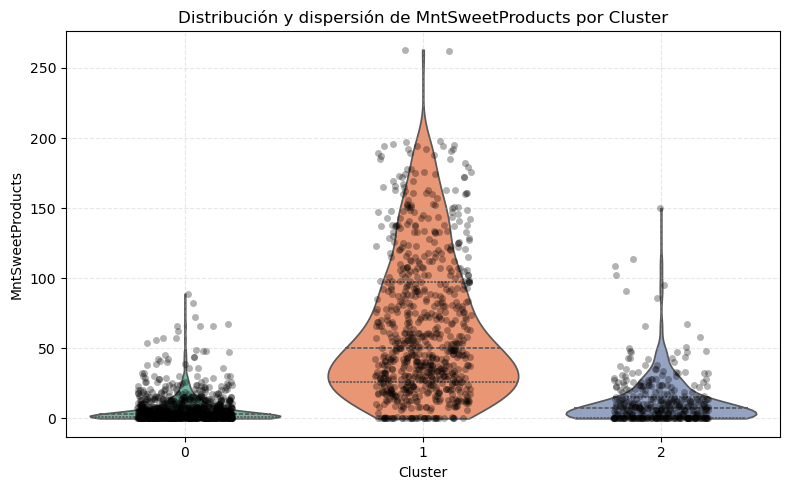

C:\Users\esteb\AppData\Local\Temp\ipykernel_22968\911285145.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




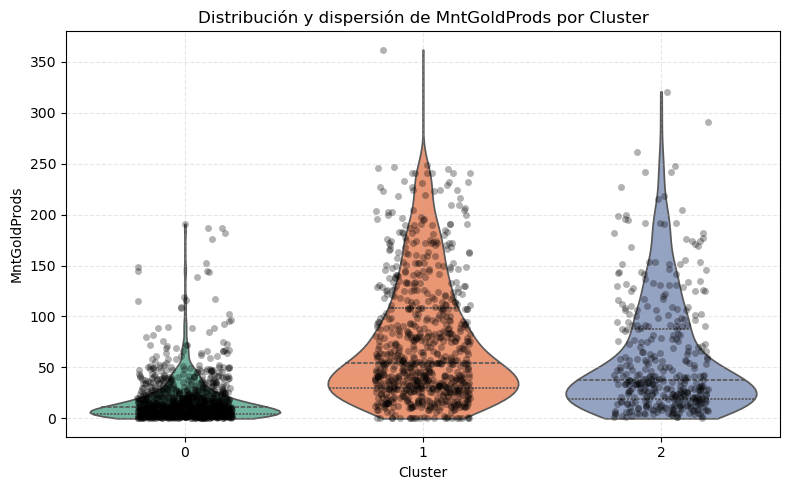

C:\Users\esteb\AppData\Local\Temp\ipykernel_22968\911285145.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




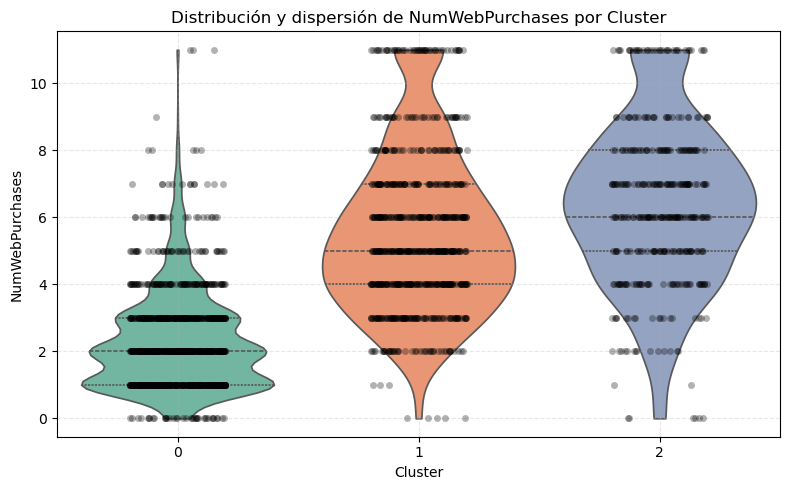

C:\Users\esteb\AppData\Local\Temp\ipykernel_22968\911285145.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




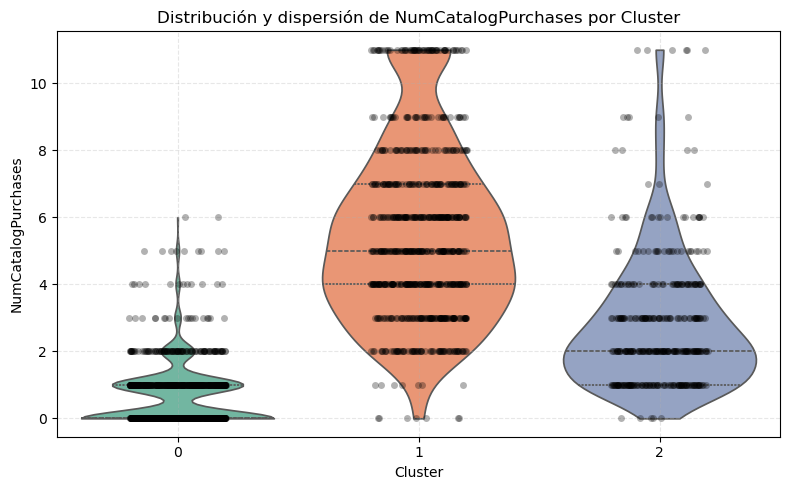

C:\Users\esteb\AppData\Local\Temp\ipykernel_22968\911285145.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




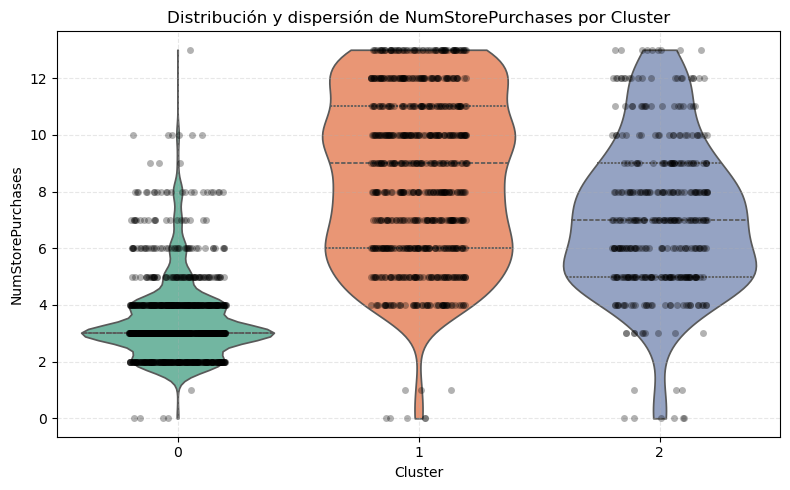

C:\Users\esteb\AppData\Local\Temp\ipykernel_22968\911285145.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




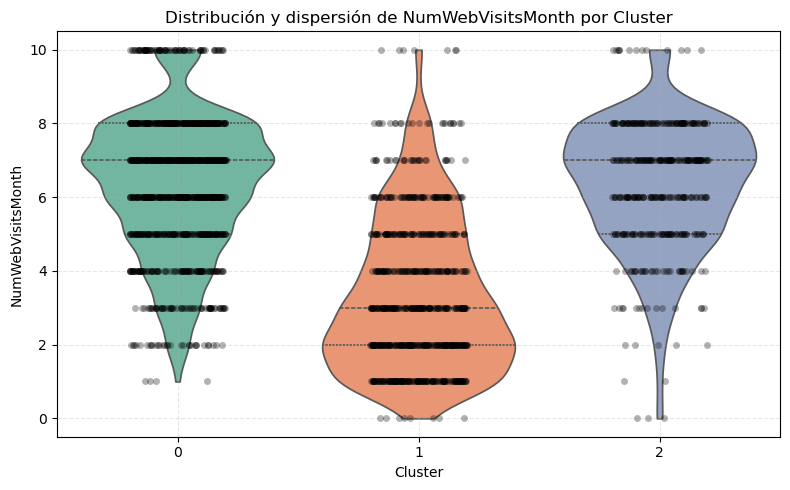

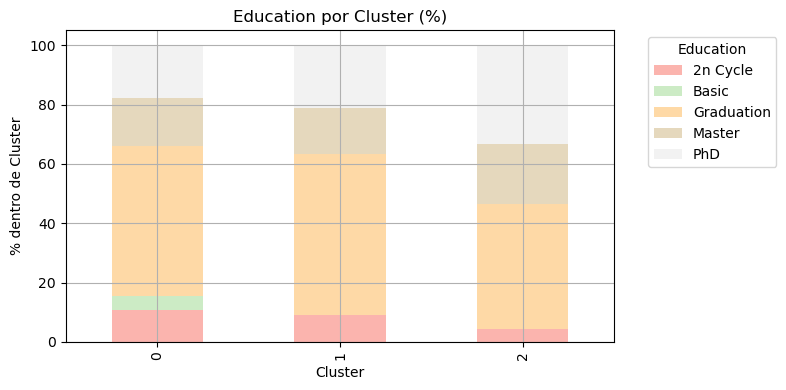

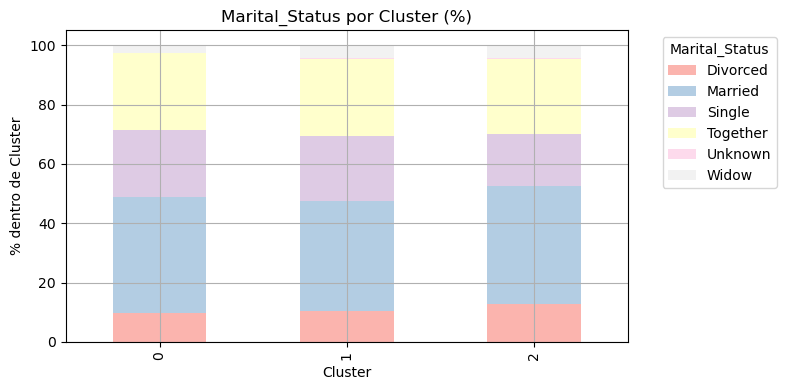

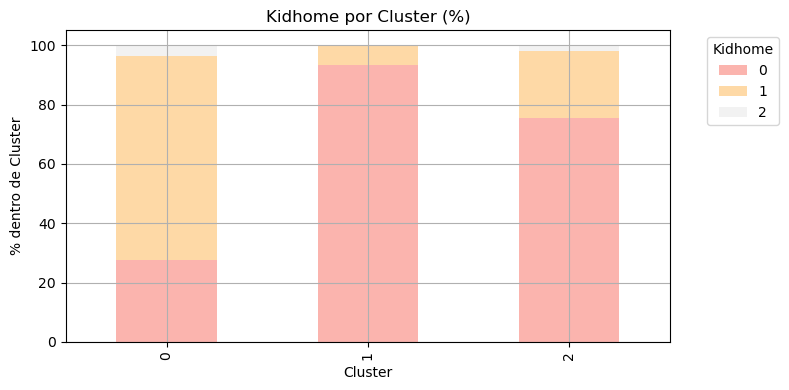

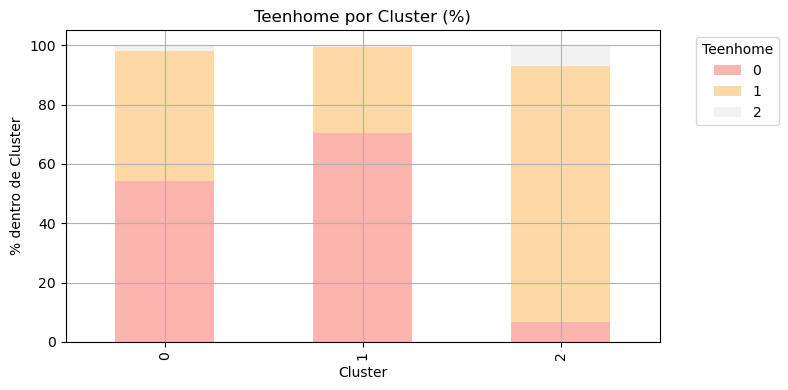

C:\Users\esteb\AppData\Local\Temp\ipykernel_22968\911285145.py:53: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\esteb\AppData\Local\Temp\ipykernel_22968\911285145.py:53: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




C:\Users\esteb\AppData\Local\Temp\ipykernel_22968\911285145.py:53: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\esteb\AppData\Local\Temp\ipykernel_22968\911285145.py:53: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




C:\Users\esteb\AppData\Local\Temp\ipykernel_22968\911285145.py:53: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\esteb\AppData\Local\Temp\ipykernel_22968\911285145.py:53: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




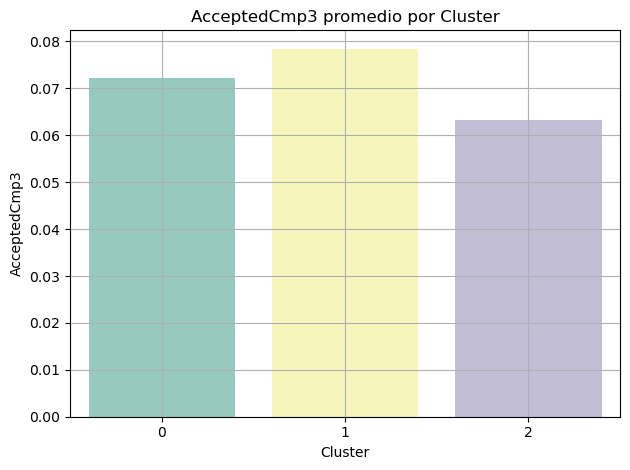

C:\Users\esteb\AppData\Local\Temp\ipykernel_22968\911285145.py:53: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\esteb\AppData\Local\Temp\ipykernel_22968\911285145.py:53: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




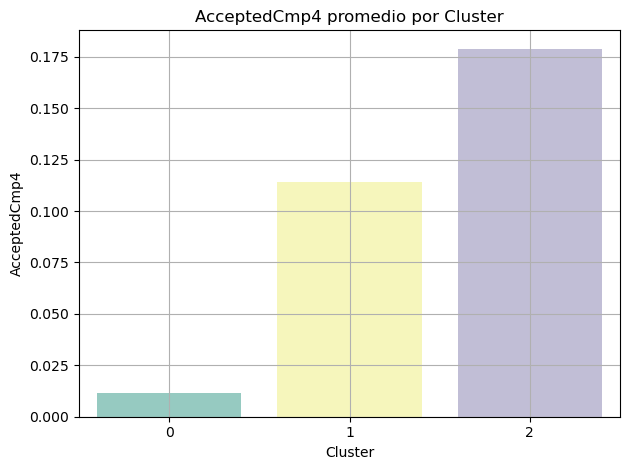

C:\Users\esteb\AppData\Local\Temp\ipykernel_22968\911285145.py:53: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\esteb\AppData\Local\Temp\ipykernel_22968\911285145.py:53: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




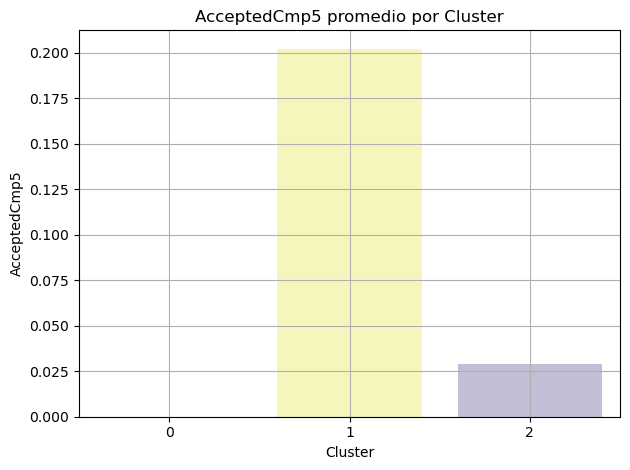

C:\Users\esteb\AppData\Local\Temp\ipykernel_22968\911285145.py:53: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\esteb\AppData\Local\Temp\ipykernel_22968\911285145.py:53: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




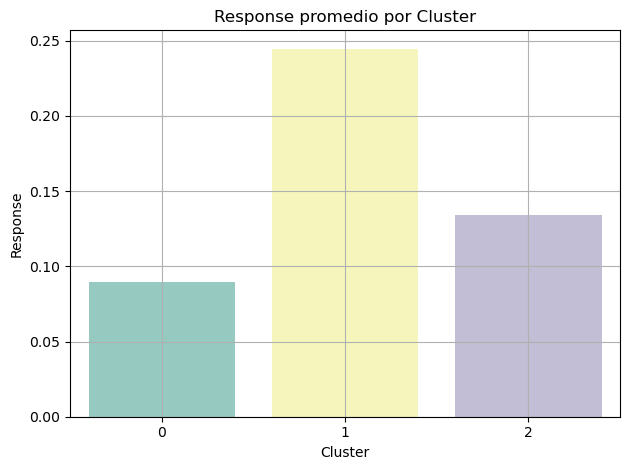

C:\Users\esteb\AppData\Local\Temp\ipykernel_22968\911285145.py:53: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\esteb\AppData\Local\Temp\ipykernel_22968\911285145.py:53: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




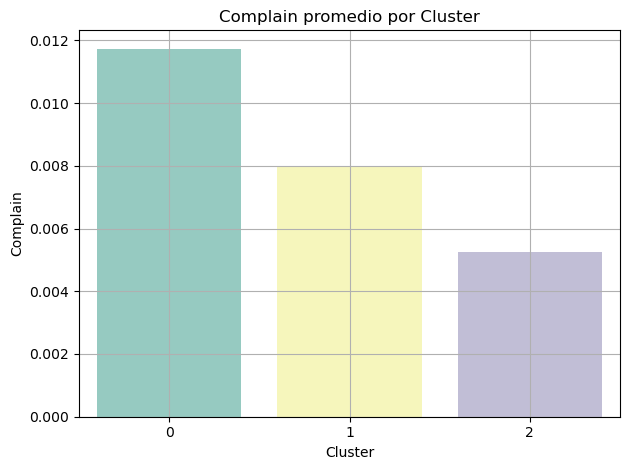


Luego de hacer el análisis cruzado, podemos describir a los siguientes clusters:

Cluster 0 - "Exploradores Digitales de Bajo Consumo": Personas de entre 40 y 60 años, de ingresos medios y vida familiar moderadamente activa. Son digitalmente curiosos, pero poco activos como compradores. Su comportamiento de compra es bajo en casi todas las categorías Este grupo está conformado por hombres y mujeres nacidos mayoritariamente entre 1965 y 1985, con ingresos medios (USD 25.000-45.000). Predomina el nivel educacional “Graduation” (60%) y cerca del 50% están casados. Aunque gran parte tiene uno o ningún hijo o adolescente en casa, su comportamiento de compra es bajo en todas las categorías de productos, incluyendo vinos, frutas, carnes, dulces y productos de lujo como el oro. Tienen escasa interacción con los canales de compra (web, catálogo, tienda), pero presentan una frecuencia relativamente alta de visitas al sitio web, lo que sugiere un comportamiento de exploración digital sin convers

In [178]:
#Análisis cruzado (clusters y variables sociodemográficas)

import seaborn as sns
import matplotlib.pyplot as plt

# Asignamos a df_final una copia de df8 con el cluster jerárquico como referencia
df_final = df8.copy()
df_final['Cluster'] = df8_pca['Agglo_Cluster']

# Lista de variables numéricas que quieres graficar
vars_numericas = [
    'Year_Birth', 'Income',
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumWebPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumWebVisitsMonth',
]

# Visualización combinada
for var in vars_numericas:
    plt.figure(figsize=(8, 5))
    
    # Violinplot base
    sns.violinplot(x='Cluster', y=var, data=df_final, palette='Set2', inner='quartile', cut=0)
    
    # Stripplot encima para ver los puntos
    sns.stripplot(x='Cluster', y=var, data=df_final, color='black', alpha=0.3, jitter=0.2)
    
    plt.title(f'Distribución y dispersión de {var} por Cluster')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

# Para variables categóricas (porcentajes por cluster)
vars_categoricas = ['Education', 'Marital_Status','Kidhome','Teenhome']

for var in vars_categoricas:
    cluster_dist = pd.crosstab(df_final['Cluster'], df_final[var], normalize='index') * 100
    cluster_dist.plot(kind='bar', stacked=True, figsize=(8, 4), colormap='Pastel1')
    plt.title(f'{var} por Cluster (%)')
    plt.ylabel('% dentro de Cluster')
    plt.xlabel('Cluster')
    plt.legend(title=var, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.grid(True)
    plt.show()

# Análisis de respuesta a marketing
marketing_vars = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                  'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']

for var in marketing_vars:
    sns.barplot(x='Cluster', y=var, data=df_final, ci=None, palette='Set3')
    plt.title(f'{var} promedio por Cluster')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

print('\nLuego de hacer el análisis cruzado, podemos describir a los siguientes clusters:')

print('\nCluster 0 - "Exploradores Digitales de Bajo Consumo": Personas de entre 40 y 60 años, de ingresos medios y vida familiar moderadamente activa. Son ' \
'digitalmente curiosos, pero poco activos como compradores. Su comportamiento de compra es bajo en casi todas las categorías Este grupo está conformado ' \
'por hombres y mujeres nacidos mayoritariamente entre 1965 y 1985, con ingresos medios (USD 25.000-45.000). Predomina el nivel educacional “Graduation” (60%)' \
' y cerca del 50% están casados. Aunque gran parte tiene uno o ningún hijo o adolescente en casa, su comportamiento de compra es bajo en todas las ' \
'categorías de productos, incluyendo vinos, frutas, carnes, dulces y productos de lujo como el oro. Tienen escasa interacción con los canales de compra '
'(web, catálogo, tienda), pero presentan una frecuencia relativamente alta de visitas al sitio web, lo que sugiere un comportamiento de exploración ' \
'digital sin conversión. Solo responden a la Campaña 3 y tienen la tasa más alta de quejas, lo que podría indicar frustración en su experiencia de cliente.')

print('\nCluster 1 - “Compradores Premium Multicanal”: Perfil de alto valor. Tienen poder adquisitivo alto, prefieren experiencias presenciales pero ' \
'son activos en todos los canales. Consumen productos premium y responden bien a estrategias de marketing. Compuesto por hombres y mujeres nacidos ' \
'principalmente en los años 70, aunque incluye también personas de los 80 y 90. Tienen ingresos elevados (USD 60.000-80.000), alto nivel educativo '
'(predominantemente “Graduation”) y la mayoría está casada. Se caracterizan por tener hogares sin hijos ni adolescentes. Son los clientes con mayor ' \
'gasto en todas las categorías, especialmente en vino, pescado, carne, dulces y oro. Son intensivos en todos los canales: destacan en catálogo, ' \
'tienda física y también compran online. Además, son los más receptivos a las campañas de marketing, con el mayor Response general, lo que los ' \
'convierte en el segmento ideal para programas de fidelización y venta cruzada. Tienen un comportamiento de quejas dentro del rango esperado.')

print('\nCluster 2 – “Digitales Sofisticados con Consumo Selectivo”: Segmento de ingresos medio-altos con enfoque digital y consumo concentrado en ' \
'productos de valor. Tienen una alta disposición a responder a campañas y mínima fricción con la empresa. Integrado principalmente por personas nacidas ' \
'entre 1960 y 1975, con ingresos que oscilan entre USD 40.000 y 70.000. Su consumo se centra en vinos y productos de lujo (oro), con gasto moderado en ' \
'carne, y bajo en frutas, dulces y pescado. Destacan por su uso intensivo del canal web, tanto para compras como para visitas, aunque hacen pocas compras ' \
'por catálogo. Prefieren las compras físicas con una frecuencia intermedia. Su perfil sugiere una alta digitalización y preferencia por experiencias cómodas ' \
'y controladas. Responden bien a campañas específicas (2, 3 y 4) y son el grupo con menor tasa de quejas, lo que los posiciona como un público silencioso ' \
'pero leal, ideal para automatización y retención digital.')